In [ ]:
!pip install pyswarms

     |████████████████████████████████| 104 kB 5.2 MB/s 


In [ ]:
# Import modules
import numpy as np
#import seaborn as sns
import pandas as pd
# Import PySwarms
import pyswarms as ps

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Initialize swarm, arbitrary
options = {'c1': 2.5, 'c2': 2.5, 'w':0.9, 'k': 30, 'p':50}



# Call instance of PSO
dimensions = 18
#optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)

#powerRating = [1.7, 1.8, 2.5, 0.175, 2.5, 0.2, 1.7, 1.7, 0.3, 0.1, 0.3, 2, 0.01, 0.2, 1.15, 2.7, 0.5, 3]
pv = [0.0, 0.0, 0.0, 0.031000000000858563, 0.5429999999996653, 1.6649999999990541, 4.873999999999796, 6.050000000001091, 6.708999999998923, 7.588000000001557, 7.3840000000000146, 7.074999999998909, 3.095000000001164, 2.631999999999607, 2.235999999998967, 1.0230000000010477, 0.20499999999992724, 0.04199999999946158, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

appliances = pd.read_csv("appliances.csv")
time_activation = np.zeros((18, 24), dtype=int)
for i in range(18):
  for j in range(24):
    if j >= appliances.iloc[i, 3] and j < appliances.iloc[i, 4]:
      time_activation[i][j] = 1



def objective_function(m, ppv, cpv, t, duration, prix_import = 3.6, prix_export = 2, pen = 100):#, t, applianceMatrix, pgrid, cgrid, pinject, cinject, ppv, cpv, Pconsumer = , Cptp =, Y):
    timeActivation = time_activation[:, t]
    agentActivation = (duration > 0).astype(np.int)
    demand = 0
    penality = 0
    for app in range(18):
      demand += m[:, app] * agentActivation[app] * timeActivation[app] * appliances['power_rating'][app]
      if agentActivation[app] * timeActivation[app] == 0:
        penality += pen * m[:, app]
      # demand = m * agentActivation * timeActivation * appliances['power_rating'] #* applianceMatrix['duration'] 
    pdemand = demand[29]

    # Pgrid en fonction de demand
    pgrid = pdemand - ppv

    # calculate the value of the power function
    # si Pgrid >0
    if pgrid >= 0:
      return pgrid * prix_import + ppv * cpv + penality # - pinject * m[:, 18] * cinject 
    # si pgrig <0 
    else:
      return pgrid * prix_export + ppv * cpv + penality# - pinject * m[:, 18] * cinject
    #return demand#m[:,0] * pgrid * cgrid - pinject* m[:,1] * cinject + ppv * cpv

arr = np.zeros((24, 18))
duration = np.array([1, 2, 1, 24, 2, 1, 1, 2, 5, 3, 5, 1, 24, 1, 12, 2, 5, 5])
for t in range(0, 24):
  # Perform optimization
  cost, pos = optimizer.optimize(objective_function, ppv = pv[t], cpv= 0.5, t=t, duration=duration, iters=100, verbose=2)
  duration = duration - np.array(pos)
  arr[t] = pos
  #print(duration)
  print(time_activation[:, t] - np.array(pos[0:18]))




2022-02-08 09:10:58,033 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0
2022-02-08 09:10:58,649 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:10:58,653 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0
2022-02-08 09:10:59,246 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:10:59,248 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0
2022-02-08 09:10:59,806 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:10:59,810 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-.0465
2022-02-08 09:11:00,398 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -0.046500000001287844, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:00,400 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-.814
2022-02-08 09:11:01,000 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -0.814499999999498, best pos: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:01,004 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-2.5
2022-02-08 09:11:01,577 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -2.497499999998581, best pos: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:01,580 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-7.31
2022-02-08 09:11:02,197 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -7.310999999999694, best pos: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:02,200 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-9.08
2022-02-08 09:11:02,784 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -9.075000000001637, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
2022-02-08 09:11:02,791 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-10.1
2022-02-08 09:11:03,373 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -10.063499999998385, best pos: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:03,374 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-11.4
2022-02-08 09:11:03,982 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -11.382000000002336, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:03,985 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-11.1
2022-02-08 09:11:04,599 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -11.076000000000022, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:04,602 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-10.6
2022-02-08 09:11:05,591 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -10.612499999998363, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
2022-02-08 09:11:05,594 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-4.64
2022-02-08 09:11:06,600 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -4.642500000001746, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
2022-02-08 09:11:06,602 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-3.95
2022-02-08 09:11:07,173 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -3.9479999999994106, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
2022-02-08 09:11:07,175 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-3.35
2022-02-08 09:11:07,761 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -3.35399999999845, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:07,766 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-1.53
2022-02-08 09:11:08,382 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -1.5345000000015716, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
2022-02-08 09:11:08,385 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-.307
2022-02-08 09:11:08,952 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -0.30749999999989086, best pos: [0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
2022-02-08 09:11:08,955 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=-.063
2022-02-08 09:11:09,515 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -0.06299999999919237, best pos: [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
2022-02-08 09:11:09,518 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0
2022-02-08 09:11:10,138 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:10,140 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0
2022-02-08 09:11:10,744 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
2022-02-08 09:11:10,749 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0
2022-02-08 09:11:11,322 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
2022-02-08 09:11:11,336 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0
2022-02-08 09:11:11,933 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
2022-02-08 09:11:11,935 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0
2022-02-08 09:11:12,588 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2022-02-08 09:11:12,590 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.5, 'c2': 2.5, 'w': 0.9, 'k': 30, 'p': 50}


[0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1]


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0
2022-02-08 09:11:13,199 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1]


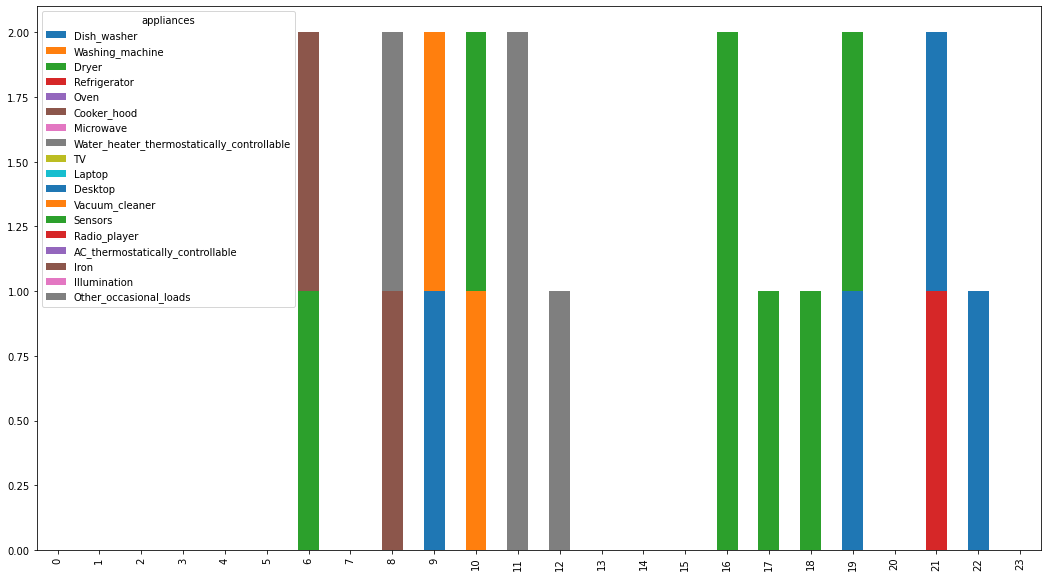

In [ ]:

df = pd.DataFrame(data=arr, columns = appliances['appliances'])
df.plot(figsize=(18,10), kind='bar', stacked=True);

[1 0]


IndexError: ignored